# ENGR 491 - Example 2.1

To illustrate the concept of consistency, stability, and convergence, consider the following equation:

$$ \dfrac{\partial u}{\partial t} - \dfrac{\partial u}{\partial x} = 0, \quad x \in \mathbb{R}, \: t \leq 0 $$

together with the initial data

$$ u(x, 0) =  \cos^2 x \quad \text{if } |x| \leq \pi/2$$ and $$u(x,0) = 0 \quad \text{if } |x| \geq \pi/2.$$.

Solve the equation numerically using a finite-difference method with a scheme that is known to be consistent (i.e. predictor-correcter method). Use a grid size of $\Delta x = 0.04 \pi$ and a time step size of $\Delta t = \beta \Delta x$.

Compare the results for 

a) $\beta = 0.5$ 

b) $\beta = 0.9$

c) $\beta = 1.1$

Experiment with how the solution changes by varying $\beta$ and how long in time the solution is conducted for (i.e. $t_{max}$).

#### Define spatial variable

In [12]:
import numpy as np
import matplotlib.pyplot as plt

dx = 0.04*np.pi
c = -1.

x = np.linspace(-4*np.pi,4*np.pi,int(np.ceil(4*np.pi/dx)))

#### Define the predictor-corrector function 

Treat these functions like a black box for now--it will numerically solve the PDE using the predictor-corrector method (don't worry that you don't know what that is at this time, we'll get to it later in the course) and sends back the solution. The func subroutine evaluates the RHS function used in the solution; again, don't worry about that at this point, we'll get to this later in the course.

In [13]:
def func(u):
    # Sub-routine to evaluate the RHS function
    f = 0*u.copy()
    f[0] =  -c*(u[1]-u[-2])/(2*dx)
    f[1:-1] = -c*(u[2:]-u[:-2])/(2*dx)
    f[-1] = -c*(u[1]-u[-2])/(2*dx)
    return f

def solve(u,tmax,dt):
    # sub-routine to solve the PDE via the predictor-corrector method
    t = 0.
    while (t < tmax):
        un = u.copy()
        ustar = un + dt*func(un)                         # predictor
        u = un + dt*0.5*(func(un) + func(ustar)) # corrector
        t+=dt
    return u

#### Define initial conditions

In [14]:
u = np.cos(x)*np.cos(x)

for i in range(0,x.size):
    if (x[i] >= np.pi/2. or x[i] <= -np.pi/2):
        u[i] = 0.

#### Solve with user-defined values of $\beta$ and $t_{max}$

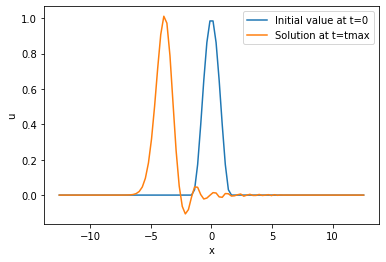

In [15]:
beta = 0.5   # user-defined value of beta
tmax = 2.0   # user-defined time to solve until

# Plot the initial values and final solution
un = solve(u,tmax,beta*dx)
plt.plot(x,u,label='Initial value at t=0')
plt.plot(x,un,label='Solution at t=tmax')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()

Consider the effect of varying beta (CFL number):

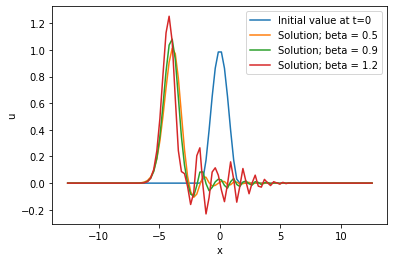

In [16]:
tmax = 2.0   # user-defined time to solve until

# Plot the initial values and final solution
plt.plot(x,u,label='Initial value at t=0')

beta = 0.5   # user-defined value of beta
un = solve(u,tmax,beta*dx)
plt.plot(x,un,label='Solution; beta = 0.5')

beta = 0.9   
un2 = solve(u,tmax,beta*dx)
plt.plot(x,un2,label='Solution; beta = 0.9')

beta = 1.2   
un3 = solve(u,tmax,beta*dx)
plt.plot(x,un3,label='Solution; beta = 1.2')

plt.xlabel('x')
plt.ylabel('u')
plt.legend()

Consider the effect of the simulation duration:

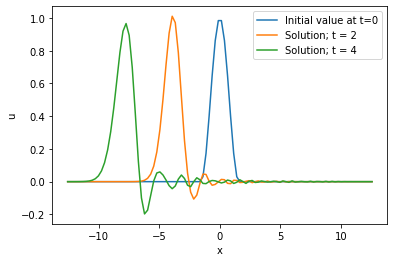

In [17]:
beta = 0.5   # user-defined value of beta

# Plot the initial values and final solution
plt.plot(x,u,label='Initial value at t=0')

tmax = 2.0   # user-defined time to solve until
un = solve(u,tmax,beta*dx)
plt.plot(x,un,label='Solution; t = 2')

tmax = 4.0   # user-defined time to solve until
un2 = solve(u,tmax,beta*dx)
plt.plot(x,un2,label='Solution; t = 4')

plt.xlabel('x')
plt.ylabel('u')
plt.legend()

Consider the effect of the convection speed:

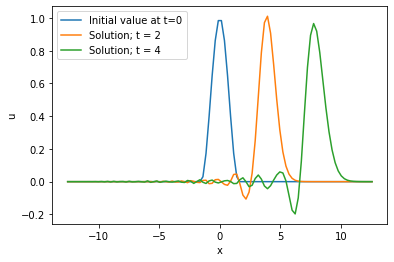

In [19]:
c = 1.
beta = 0.5   # user-defined value of beta

# Plot the initial values and final solution
plt.plot(x,u,label='Initial value at t=0')

tmax = 2.0   # user-defined time to solve until
un = solve(u,tmax,beta*dx)
plt.plot(x,un,label='Solution; t = 2')

tmax = 4.0   # user-defined time to solve until
un2 = solve(u,tmax,beta*dx)
plt.plot(x,un2,label='Solution; t = 4')

plt.xlabel('x')
plt.ylabel('u')
plt.legend()